<center><h2> CPE 4040: Homework 4</h2></center>

1. Write your answer in the cell provided under each question.
2. __You must write comments to explain your thoughts and earn full credit__.
3. __Show your execution result__.
4. Do your own work. __Do not copy-and-paste other people's (or Generative AI's) codes.__
5. <font color=blue> You can find Matplotlib code snippets in the accompanying Jupyter Notebook file to help you make time-domain and frequency-domain plots.  

### Submission:
 * __Submit this notebook file and the pdf version__ - remember to add your name in the filename.

In [1329]:
import pandas as pd
import numpy as np

from numpy.fft import fft, ifft

In [1330]:
import matplotlib.pyplot as plt

## Q1: Signal Processing: Square Wave and Random Noise (60 Points)

__A communication system is commonly modelled by the transmitted signal, the channel, and the receiver.__ 

__Let's consider a simple system where the signal is a `square wave` and the the channel adds `white Gaussian noise` to the signal. Therefore, the received signal is represented by__

__$$r(t) = s(t) + n(t)$$ where $s(t)$ = square wave, $n(t)$ = Gaussian noise.__

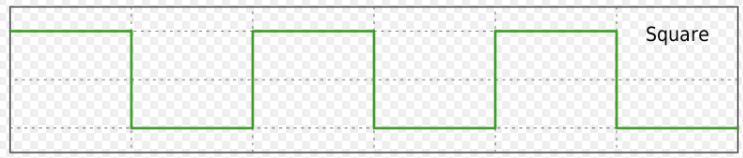

### 1. (8 Points) Generate a periodic square wave by taking a `sign function` on the sine wave, that is,

$$
s(t) = 
\begin{cases} 
1 & \text{if } \sin(2\pi ft) \ge 0 \\
-1 & \text{if } \sin(2\pi ft) < 0
\end{cases}
$$

* Plot a 10-second __square wave__ with amplitude 1, $f$ = 4Hz and sampling rate $f_s$ = 100Hz. Use Matplotlib to plot the signal. You should have a total of 1000 samples. 

* Properly label the x-axis ("Time"), and y-axis ("Amplitude").


In [1331]:
def generate_sine_wave(freq: int, sample_rate:int, duration: int) -> np.ndarray | np.ndarray:

    t = np.linspace(0, duration, sample_rate * duration, endpoint=False)
    y = np.sin((2 * np.pi) * freq * t)
    
    return t, y

### <font color= green> Generate the square wave

In [1332]:
def sign_function(s):
    if s >= 0:
        return 1
    if s < 0:
        return -1

def square_wave(freq: int, sample_rate:int, duration: int)  -> np.ndarray | np.ndarray:
    t, y = generate_sine_wave(freq, sample_rate, duration)

    y = np.array([sign_function(x) for x in y])

    return t, y
    

freq = 4#Hz
sampling = 100#Hz
duration = 10#s

t, y = square_wave(freq, sampling, duration)

### <font color= green> Plot the square wave

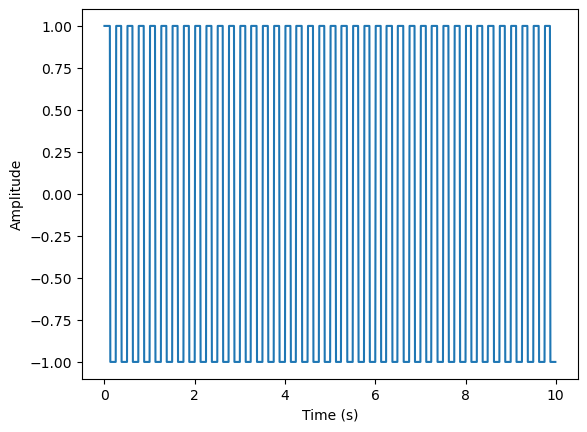

In [1333]:
fig, ax = plt.subplots()
ax.set_xlabel("Time (s)")
ax.set_ylabel("Amplitude")
ax.plot(t, y)
plt.show()

### 2. (6 Points) Frequency domain representation of the square wave. 

Apply the `calculate_fft( )` function below and use Matplotlib to plot the Fourier Transform result for `frequency range from 0 to 50 Hz`.

In [1334]:
def calculate_fft(signal,fs):
    N = len(signal)
    n = np.arange(N)
    freqs = n*fs/N               # the frequency bins
    mag_fft = abs(fft(signal)/N)   # calculate the magnitude of fft
    return freqs, mag_fft

### <font color= green> Calculate the FFT

In [1335]:
freqs, mag_fft = calculate_fft(y, sampling)

### <font color= green> Plot FFT of the square wave for frequency range 0 to 50Hz

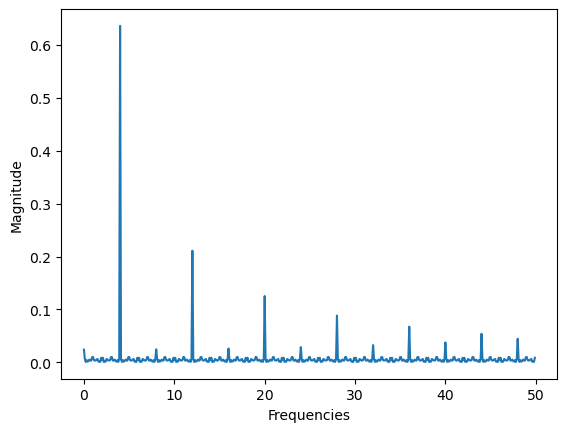

In [1336]:
mask = freqs < 50

filtered_mags = mag_fft[mask]
filtered_freqs = freqs[mask]

fig, ax = plt.subplots()
ax.set_xlabel("Frequencies")
ax.set_ylabel("Magnitude")
ax.plot(filtered_freqs, filtered_mags)
plt.show()


### 3. (10 Points) Find Peak Frequency Components 

You can see a few distinct peaks in the FFT from Step 2. Write a code to identify the frequencies of the top five peaks in the FFT plot, `for frequency range from 0 to 50 Hz`.

Please list the frequencies and their corresponding magnitudes.

[36. 28. 20. 12.  4.]


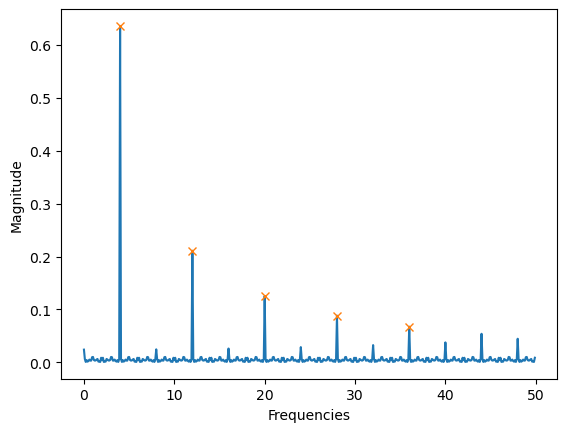

In [1337]:
from scipy.signal import find_peaks



peaks, _ = find_peaks(filtered_mags)

peak_mags = filtered_mags[peaks]
top_5_mags = peaks[np.argsort(peak_mags)[-5:]]

print(filtered_freqs[top_5_mags])

fig, ax = plt.subplots()
ax.set_xlabel("Frequencies")
ax.set_ylabel("Magnitude")
ax.plot(filtered_freqs, filtered_mags)
ax.plot(filtered_freqs[top_5_mags], filtered_mags[top_5_mags], "x")
plt.show()


### 4. (5 Points) Generate an array of Gausian noise with mean = 0 and standard deviation = 0.5

Use `np.random.normal` to generate the noise array. The size of the noise array should also be 1000.

Add the square wave array from 1 and the noise array together. Plot the resulting array.

### <font color= green> Generate the Gaussian noise and the noisy signal

In [1338]:
def square_with_noise(freq: int, sample_rate:int, duration: int) -> np.ndarray | np.ndarray:
    t, y = square_wave(freq, sample_rate, duration)
    noise = np.random.normal(0, 0.5, t.size)
    y = np.add(y, noise)

    return t, y

freq = 4#Hz
sampling = 100#Hz
duration = 10#s

t, y_noise = square_with_noise(freq, sampling, duration)

### <font color= green> Plot the noisy signal

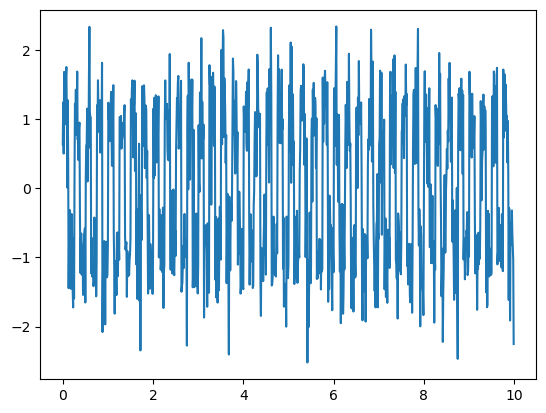

In [1339]:
fig, ax = plt.subplots()
ax.plot(t, y_noise)
plt.show()

### 5. (6 Points) Signal-to-noise ratio (SNR) is an important quality indicator of the communication channel.

     SNR(dB) = 10log10(P_s/P_n), where P_s is the average signal power and P_n is the average noise power.

Please calculate the SNR(dB) of this case. The average power of a sequence of signals = $\sum_{i=1}^N s^2/N$, where $N$ is the number of samples.

In [1340]:

def P_n(signal: np.ndarray) -> float:
    square = np.multiply(signal, signal)
    return np.average(square)

def snr (signal: np.ndarray) -> np.ndarray:
    pn = P_n(signal)
    ratio = signal / pn
    return 10 * np.log10(ratio)

snr(y_noise)

C:\Users\rbrin\AppData\Local\Temp\ipykernel_35876\2945329666.py:8: RuntimeWarning: invalid value encountered in log10
  return 10 * np.log10(ratio)


array([-2.87966088e+00,  3.38433226e-02, -3.89445942e+00,  1.35470759e+00,
        6.32637989e-01, -1.23847837e+00,  2.37357284e-01,  1.12918370e+00,
        1.53212618e+00, -8.08853985e-01, -2.04758970e+01,  1.44561005e-01,
       -5.16455825e+00,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan, -1.03033021e+01, -2.87151928e-02,
       -1.22981953e+00,  6.34314909e-01, -2.00812556e+00, -4.32370031e-01,
        1.36654843e+00, -2.43008562e+00, -1.94254410e+00, -4.80852633e+00,
       -1.48511302e+00, -1.13192479e+00,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan, -8.65095339e+00,
       -2.95019790e+00, -

### 6. (10 Points) Implement a moving-average low-pass filter. 

A moving-average filter is a simple yet effective digital low-pass filter that reduces random noises in the signal. It is characterized by its filter length $L$, specifying how many of the last points of the signal will be averaged to produce the next point in the output.

$$y[n] = \frac{1}{L}\sum_{i=0}^{L-1}x[n-i] $$
where $x[n]$ is the noisy signal, $L$ is the length of the filter, and $y[n]$ is the filtered signal.

* Write a Python function `moving_average_filter` that implements this low-pass filter. The function should accept two parameters: `noisy_signal` and `L`. It should return the filtered signal array. For this exercise, set $L=7$ for the length of the filter.

* Visualization: Plot the noisy signal and the filtered signal in the same figure.

* Please make a comment to compare the signals before and after the filtering. 

### <font color= green> Define the function for moving-average filter and calculate the filter output

In [1341]:
def moving_average_filter(noisy_signal: np.ndarray, L: int = 7) -> np.ndarray:
    filtered_signal = np.zeros(len(noisy_signal) - L + 1)
    for n in range(L - 1, len(y_noise)):
        filtered_signal[n - L + 1] = np.sum(noisy_signal[n - L + 1: n + 1]) / L

    return filtered_signal

low_pass = moving_average_filter(y_noise)

### <font color= green> Plot the noisy signal and the filtered signal

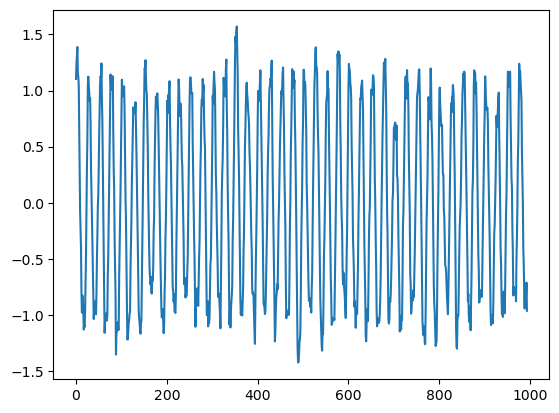

In [1342]:
fig, ax = plt.subplots()
ax.plot(low_pass)
plt.show()

### <font color=green> Compare the signals before and after the filtering.

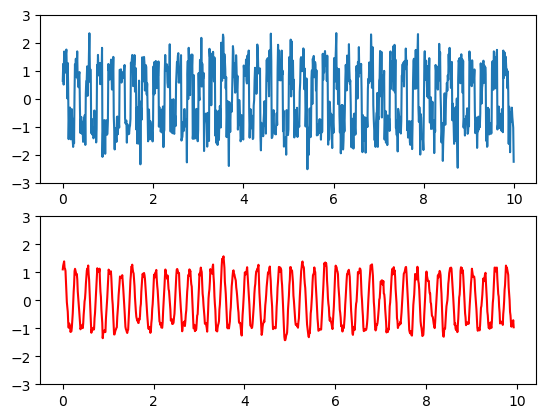

In [1343]:
plt.subplot(2, 1, 1)
plt.plot(t, y_noise)
plt.ylim(-3, 3)

plt.subplot(2, 1, 2)
plt.plot(t[0:994], low_pass, 'r')
plt.ylim(-3, 3)
plt.show()

### 7. (8 Points) Frequency Domain view of the noisy signal and the filtered signal¶

Use FFT to transform both the noisy signal and the filtered signal to the frequency domain.

Visualization: Plot the noisy signal and the filtered signal in the same figure for comparison.You only need to plot in the frequency range between 0 to 5Hz.

Please make an observation on:
* The noise levels before and after moving-average filtering
* The peak frequency components: what happened there?

### <font color=green> Calculate the FFTs

In [1344]:
freq_original, mag_original = calculate_fft(y_noise, sampling)
freq_low_pass, mag_low_pass = calculate_fft(low_pass, sampling)

### <font color= green> Plot FFTs for both the noisy signal and the filtered signal, for frequency range from 0 to 50Hz

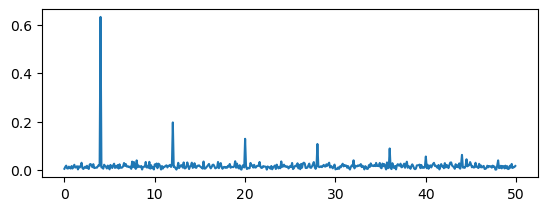

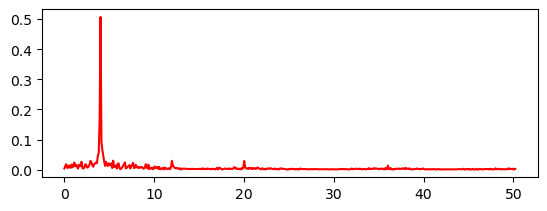

In [1345]:
mask = freqs < 50

filtered_mags_original = mag_original[mask]
filtered_freqs_original = freq_original[mask]

mask_low = freqs[:994] < 50

filtered_mags_low = mag_low_pass[mask_low]
filtered_freqs_low = freq_low_pass[mask_low]

plt.subplot(2,1,1)
plt.plot(filtered_freqs_original, filtered_mags_original)
plt.show()

plt.subplot(2,1,2)
plt.plot(filtered_freqs_low, filtered_mags_low, 'r')
plt.show()

### <font color=green> Your observations

It appears that the low-pass filter worked. There is only one major peak and it is in the lower frequency range.

### 8. (7 Points) Frequency domain representation of the moving-average filter¶

To gain an insight on how the signal and the noise are shaped by the moving-average filter in the frequency domain, you will calculate the FFT of the filter (we call it the `frequency response`).

Recall in Step 6, the $L$-tap moving-average filter is represented by 
$$ h = \big[ \frac{1}{L}, \frac{1}{L}, \frac{1}{L}, \cdots, \frac{1}{L} \big] $$

* Apply FFT on the filter, $h$, and plot the result for frequency range from 0 to 50Hz. Assume $L=7$. 

* Please make a comment on the shape of the frequency response and explain how it affects the noise and signal in Step 7.

### <font color=green> Calculate the FFT of the 7-tap moving-average filter

In [1346]:
L = 7
h = np.ones(L) / L  


freqs_h, mag_fft_h = calculate_fft(h, sampling)

### <font color= green> Plot FFT of the 7-tap moving-average filter

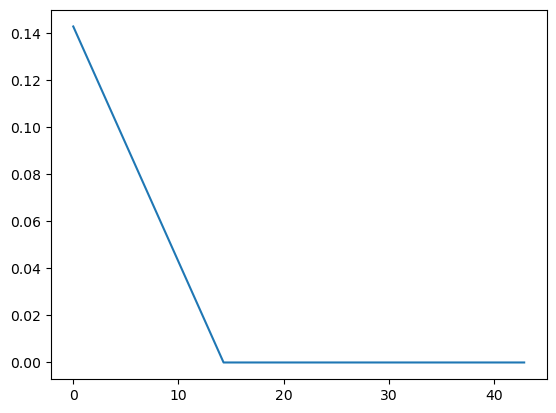

In [1347]:
mask = freqs_h < 50

freqs_h_50 = freqs_h[mask]
mag_fft_h_50 = mag_fft_h[mask]

plt.plot(freqs_h_50, mag_fft_h_50)
plt.show()

### <font color=green> Make a comment on the shape of the frequency response and explain how it affects the noise and signal in Step 7

The low-pass filter only lets low frequency signals through. This is what the line is showing, there are only non-zero values for frequencies under 15Hz.

<h2>Q2: DataFrame indexing and slicing (20 Points)</h2>

<h3>1. Create a DataFrame with the same row indices, column labels, and data as the table below.</h3>

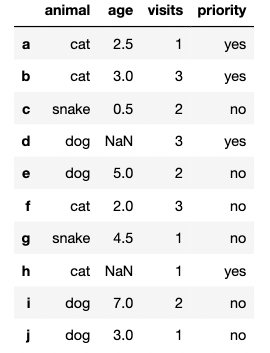

<h3>2. Select only the 'animal' and 'visits' columns from the DataFrame and show the result.</h3>

<h3>3. Select the data in rows 'c', 'f', and 'g' and in columns 'animal' and 'age'. Show the result.</h3>

<h3>4. Select the rows where the animal is a dog and the age is less than 5.</h3>

<h3>5. In the 'animal' column, change the 'snake' entries to 'python'</h3>

<h3>6. Select the rows where the age is missing, i.e. age value is NaN.</h3>

<h3>7. We want to clean up the NaN by replacing it with the average age of the dogs (or cats).</h3>
<h3>First, please find out the average age of the dogs and the average age of the cats.</h3>

<h3>8. Replace the NaNs with the average ages and show the resulting DataFrame</h3>

<h2>Q3: DataFrame Arithmetics (20 Points)</h2>
    
<h3> 1. Generate a DataFrame that has 10 rows and 8 columns of random numbers (use np.random.rand). </h3>
<h3>Label the columns A, B, C, D, E, F, G and H.</h3>

<h3>2. Calculate the sum of numbers for each column. Display the result.</h3>

<h3>3. Which column has the smallest sum? Please answer with the column label.</h3>

<h3>4. Calculate the mean value for each row, then subtract the mean from each element in the row.</h3>

<h3>5. Add an additional row with the mean value of each column. Label this new row "Average".</h3>